In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('train.csv')
df.drop('id', axis=1, inplace=True)

In [8]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      630000 non-null  int64  
 1   Sex                      630000 non-null  int64  
 2   Chest pain type          630000 non-null  int64  
 3   BP                       630000 non-null  int64  
 4   Cholesterol              630000 non-null  int64  
 5   FBS over 120             630000 non-null  int64  
 6   EKG results              630000 non-null  int64  
 7   Max HR                   630000 non-null  int64  
 8   Exercise angina          630000 non-null  int64  
 9   ST depression            630000 non-null  float64
 10  Slope of ST              630000 non-null  int64  
 11  Number of vessels fluro  630000 non-null  int64  
 12  Thallium                 630000 non-null  int64  
 13  Heart Disease            630000 non-null  object 
dtypes: f

In [10]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,54.136706,0.714735,3.312752,130.497433,245.011814,0.079987,0.981660,152.816763,0.273725,0.716028,1.455871,0.451040,4.618873
std,8.256301,0.451541,0.851615,14.975802,33.681581,0.271274,0.998783,19.112927,0.445870,0.948472,0.545192,0.798549,1.950007
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,223.000000,0.000000,0.000000,142.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,54.000000,1.000000,4.000000,130.000000,243.000000,0.000000,0.000000,157.000000,0.000000,0.100000,1.000000,0.000000,3.000000
75%,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,166.000000,1.000000,1.400000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


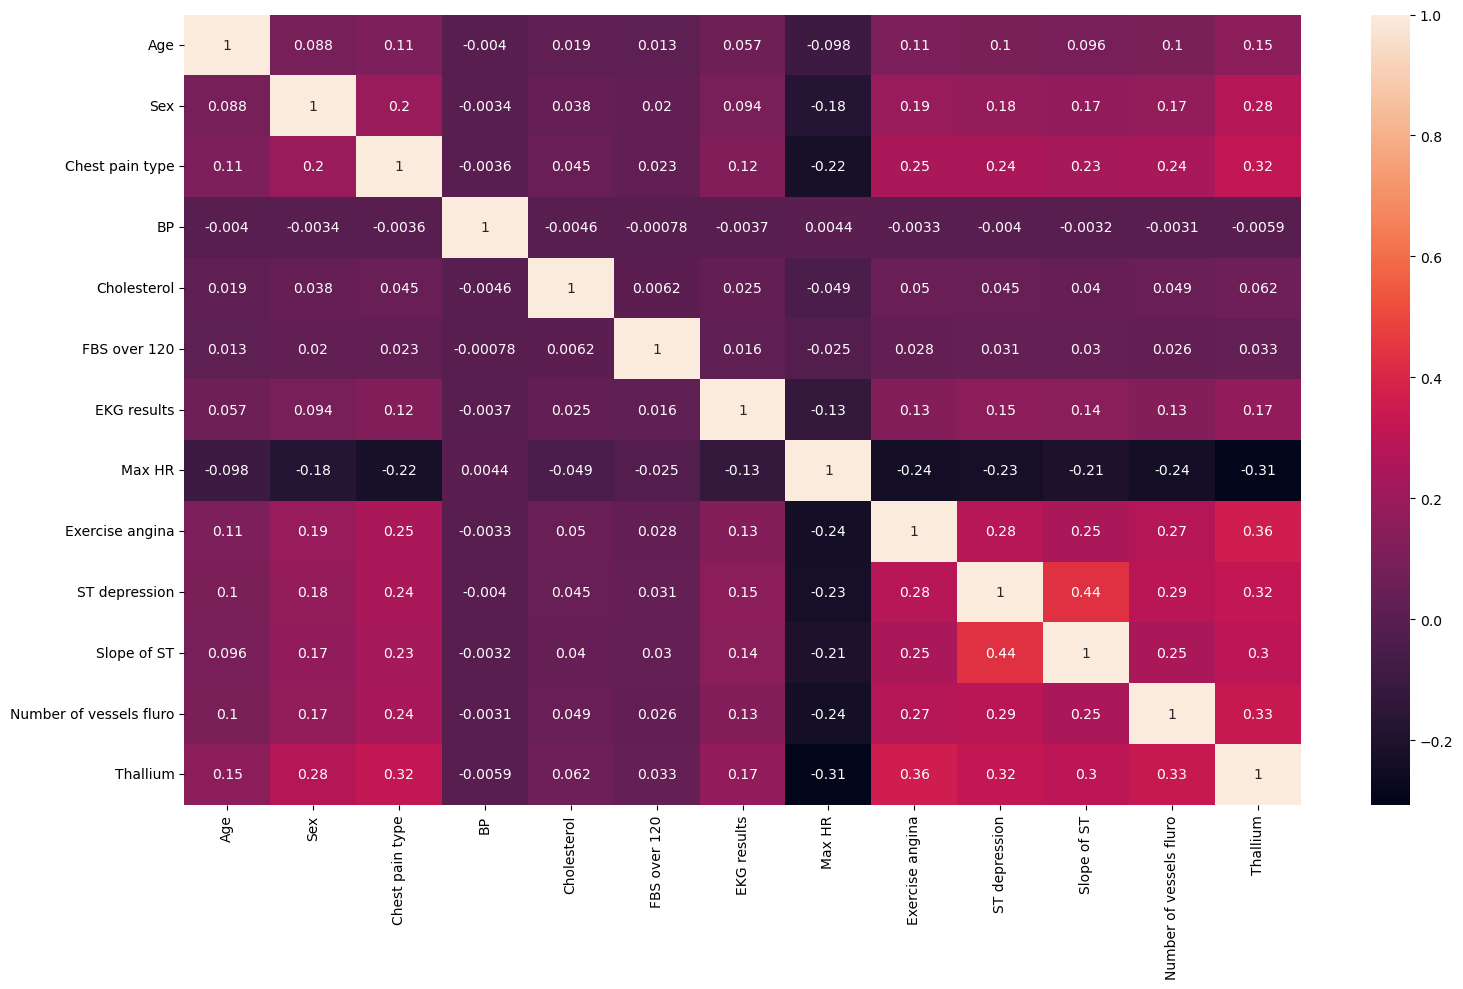

In [15]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.tight_layout()

In [16]:
df['Heart Disease'].value_counts()

Heart Disease
Absence     347546
Presence    282454
Name: count, dtype: int64

In [19]:
df['Heart Disease'] = df['Heart Disease'].map({'Absence': 0, 'Presence': 1})

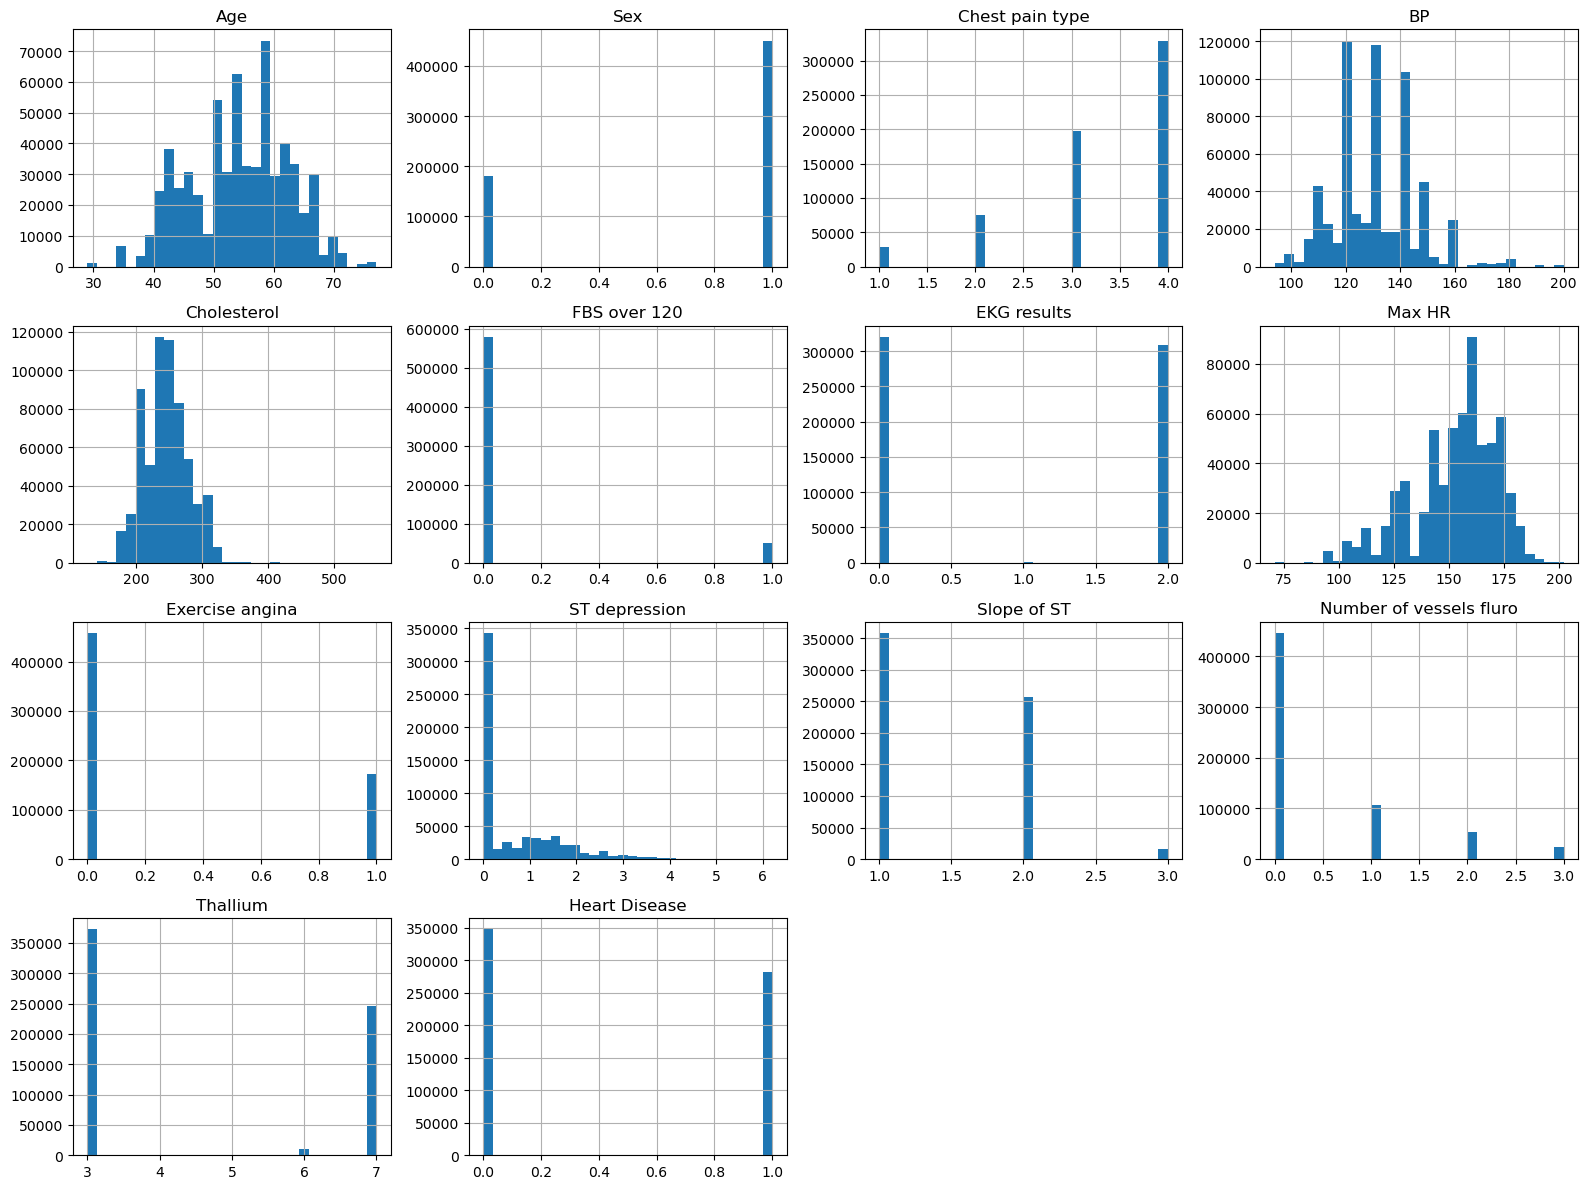

In [ ]:
num_cols = df.select_dtypes(include='number').columns
df[num_cols].hist(figsize=(16, 12), bins=30)
plt.tight_layout()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num_cols = ['Age', 'Cholesterol', 'Max HR']
other_cols = [c for c in df.columns if c not in num_cols + ['Heart Disease']]

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('other', 'passthrough', other_cols)
    ]
)

,num__Age,num__Cholesterol,num__Max HR,other__Sex,other__Chest pain type,other__BP,other__FBS over 120,other__EKG results,other__Exercise angina,other__ST depression,other__Slope of ST,other__Number of vessels fluro,other__Thallium
0,0.467921,-0.178490,0.271190,1.0,4.0,152.0,0.0,0.0,1.0,3.6,2.0,2.0,7.0
1,-0.258797,2.374837,0.951359,1.0,1.0,125.0,0.0,2.0,0.0,0.0,1.0,0.0,3.0
2,0.225682,-1.692672,-0.095054,0.0,2.0,160.0,0.0,2.0,0.0,0.0,1.0,0.0,3.0
3,-1.227755,-0.475388,-0.147375,0.0,3.0,134.0,0.0,2.0,0.0,1.0,2.0,0.0,3.0
4,0.467921,-0.326939,-1.455391,1.0,4.0,140.0,0.0,2.0,1.0,3.8,2.0,3.0,3.0


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score


X = df.drop(columns=['Heart Disease'])
y = df['Heart Disease']

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('clf', LogisticRegression(max_iter=1000, n_jobs=-1)),
    ]
)

model.fit(X_train, y_train)
pred = model.predict(X_valid)
proba = model.predict_proba(X_valid)[:, 1]

acc = accuracy_score(y_valid, pred)
roc = roc_auc_score(y_valid, proba)
acc, roc


(0.8846904761904761, np.float64(0.9515481469939767))

In [ ]:
df_test = pd.read_csv()

In [ ]:
test_df = pd.read_csv('test.csv')
sample_sub = pd.read_csv('sample_submission.csv')

test_X = test_df.drop(columns=['id']) if 'id' in test_df.columns else test_df.copy()

final_model = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('clf', LogisticRegression(max_iter=1000, n_jobs=-1)),
    ]
)

final_model.fit(X, y)
test_proba = final_model.predict(test_X)

submission = sample_sub.copy()
target_col = submission.columns[-1]
submission[target_col] = test_proba

submission.to_csv('submission.csv', index=False)
submission.head()


,id,Heart Disease
0,630000,1
1,630001,0
2,630002,1
3,630003,0
4,630004,0


Exception ignored in: <function ResourceTracker.__del__ at 0x102d65bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104f71bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1118c9bc0>
Traceback (most recent call last